In [1]:
import sys
import json
from pathlib import Path
from torchvision import datasets

In [2]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

data_root = project_root / "data"
data_root.mkdir(parents=True, exist_ok=True)

In [3]:
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

from utils.utils import set_seed

set_seed()

from models.simple_cnn import init_model_cnn
from methods.sisa.sisa_utils import create_sisa_structure
from methods.sisa.sisa_utils import recreate_sisa_dataloaders
from methods.sisa.sisa_train_test import sisa_train, sisa_test, retrain_sisa_framework
from methods.sisa.sisa_utils import evaluate_aggregated_model, update_sisa_structure

Device used: cuda


In [4]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 10
SHARDS = 3
SLICES = 5

In [5]:
*_, transform = init_model_cnn()

Init model...
Done initializing model.
Model ID: 1917770494016, Optimizer ID: 1916977457344, Criterion ID: 1916977462912


In [6]:
train_dataset = datasets.MNIST(
    root=data_root, train=True, transform=transform, download=True
)
test_dataset = datasets.MNIST(
    root=data_root, train=False, transform=transform, download=True
)

In [7]:
results_path = project_root / "results" / "mnist" / "sisa"

In [8]:
sisa_structure_file = results_path / "sisa_structure.json"

In [9]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=sisa_structure_file,
    batch_size=BATCH_SIZE,
    val_ratio=0.1,
)

In [10]:
save_models_metrics_dir = results_path / "sisa_models"

In [11]:
sisa_test(
    dataloaders=dataloaders,
    saved_models_metrics_dir=save_models_metrics_dir,
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True,
    results_path=results_path
)

Init model...
Done initializing model.
Model ID: 1917770493872, Optimizer ID: 1918571551552, Criterion ID: 1918571551504
Loading and testing model: D:\Unlearning\results\mnist\sisa\sisa_models/shard_0_CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\sisa\sisa_models/shard_0_final_model.pth: 100%|██████████| 157/157 [00:02<00:00, 74.22it/s]


Predictions and labels saved to D:\Unlearning\results\mnist\sisa\sisa_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 1918572610992, Optimizer ID: 1918572609936, Criterion ID: 1918572610272
Loading and testing model: D:\Unlearning\results\mnist\sisa\sisa_models/shard_1_CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\sisa\sisa_models/shard_1_final_model.pth: 100%|██████████| 157/157 [00:02<00:00, 76.40it/s]


Predictions and labels saved to D:\Unlearning\results\mnist\sisa\sisa_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 1918571552848, Optimizer ID: 1918572612096, Criterion ID: 1918572611856
Loading and testing model: D:\Unlearning\results\mnist\sisa\sisa_models/shard_2_CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\sisa\sisa_models/shard_2_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 80.28it/s]

Predictions and labels saved to D:\Unlearning\results\mnist\sisa\sisa_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to D:\Unlearning\results\mnist\sisa\sisa_final_evaluation.json


In [12]:
with open(results_path / "sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9860
  Precision: 0.9860
  Recall: 0.9860
  F1 Score: 0.9860
Shard shard_1 Metrics:
  Accuracy: 0.9867
  Precision: 0.9868
  Recall: 0.9867
  F1 Score: 0.9867
Shard shard_2 Metrics:
  Accuracy: 0.9860
  Precision: 0.9860
  Recall: 0.9860
  F1 Score: 0.9860

Aggregated Model Metrics:
  Accuracy: 0.9882
  Precision: 0.9882
  Recall: 0.9882
  F1 Score: 0.9882


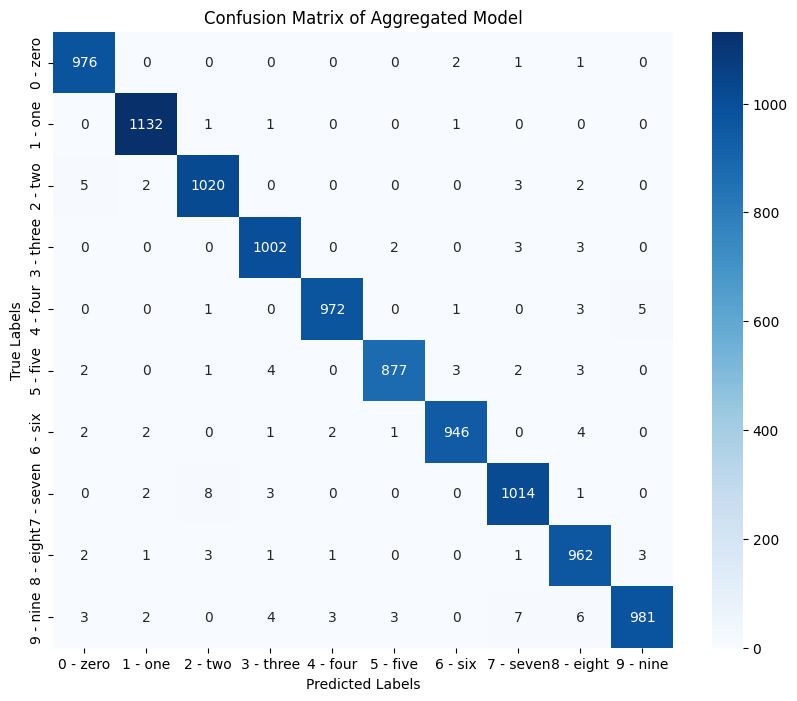

In [13]:
evaluate_aggregated_model(results, classes)

# Unlearning results

In [14]:
mnist_sisa_structure = results_path / "sisa_structure.json"
updated_sisa_structure = results_path / "updated_sisa_strucute.json"
deleted_samples = results_path / "deleted_samples.json"

In [15]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=updated_sisa_structure,
    batch_size=BATCH_SIZE,
    val_ratio=0.1,
)

In [16]:
save_path = results_path / "sisa_updated_models"

In [17]:
sisa_test(
    dataloaders=dataloaders,
    saved_models_metrics_dir=save_path,
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True,
    results_path=results_path
)

Init model...
Done initializing model.
Model ID: 1918571551120, Optimizer ID: 1918571550304, Criterion ID: 1918571550064
Loading and testing model: D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_0_CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_0_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 85.14it/s]


Predictions and labels saved to D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 1918455342576, Optimizer ID: 1918455349152, Criterion ID: 1918455348528
Loading and testing model: D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_1_CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_1_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 86.61it/s]


Predictions and labels saved to D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 1918572625776, Optimizer ID: 1916977457488, Criterion ID: 1916977457296
Loading and testing model: D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_2_CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_2_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 85.11it/s]

Predictions and labels saved to D:\Unlearning\results\mnist\sisa\sisa_updated_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to D:\Unlearning\results\mnist\sisa\sisa_final_evaluation.json


In [18]:
with open(results_path / "sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9844
  Precision: 0.9844
  Recall: 0.9844
  F1 Score: 0.9844
Shard shard_1 Metrics:
  Accuracy: 0.9852
  Precision: 0.9852
  Recall: 0.9852
  F1 Score: 0.9852
Shard shard_2 Metrics:
  Accuracy: 0.9847
  Precision: 0.9847
  Recall: 0.9847
  F1 Score: 0.9847

Aggregated Model Metrics:
  Accuracy: 0.9882
  Precision: 0.9882
  Recall: 0.9882
  F1 Score: 0.9882


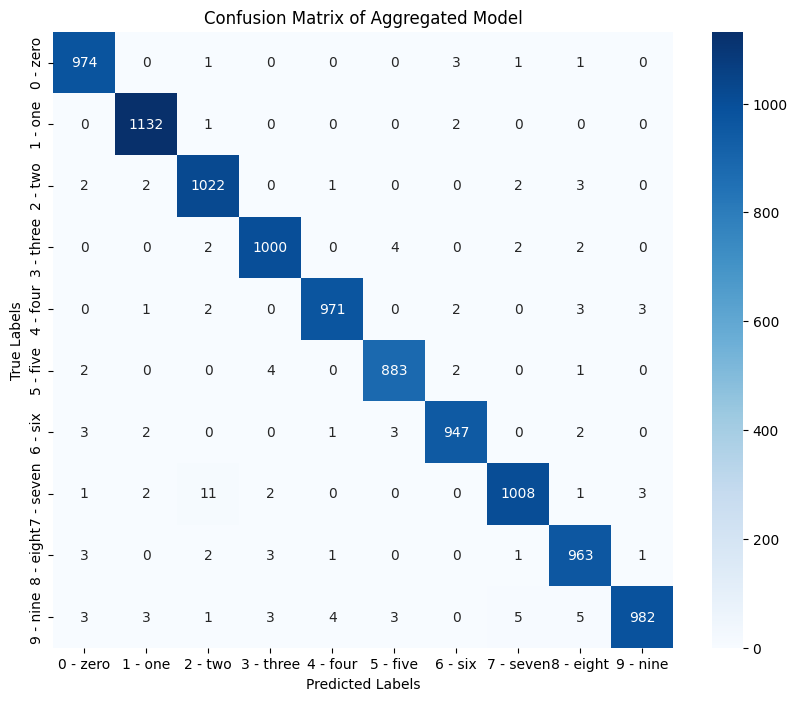

In [19]:
evaluate_aggregated_model(results, classes)